In [2]:
# Grokking Deep Learning by Andrew W. Trask
# Ch 4: Gradient Descent

# Mean Squared Error: one simple way to calculate error of prediction.

knob_weight = 0.5
input = 0.5

# Real measured result.
goal_pred = 0.8

pred = input * knob_weight

# Squared to force positive error. Negative error does not make sense since we consider all error positive.
# Also, small <1 errors are reduced in importance and big >1 errors are amplified in importance, which is okay
# since this is realistic (if error is 10, adjusted = 100; if 0.01, adjusted = 0.0001). Ideally, we want error to be 0.
error = (pred - goal_pred) ** 2

print(error)

0.30250000000000005


In [1]:
weight = 0.5
input = 0.5
goal_prediction = 0.8

# how much to move the weight every time it corrects itself
step_amount = 0.001

for iteration in range(1101):
    prediction = input * weight
    error = (prediction - goal_prediction) ** 2
    
    # commented out the print statement because it produces huge block of text
    # print("Error: " + str(error) + "  Prediction: " + str(prediction))
    
    up_prediction = input * (weight + step_amount)
    up_error = (goal_prediction - up_prediction) ** 2
    
    down_prediction = input * (weight - step_amount)
    down_error = (goal_prediction - down_prediction) ** 2
    
    if (down_error < up_error):
        weight = weight - step_amount
    elif (down_error > up_error):
        weight = weight + step_amount

# This is hot and cold learning. It's inefficient and the fixed step amount is a bummer.

In [1]:
# In comparison, here is GRADIENT DESCENT. It calculates the direction and the amount of the step we should apply
# to the weight in one calculation.

weight = 0.5
goal_pred = 0.8
input = 0.5

for iteration in range(20):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    
    # Gradient descent!
    # Multiply pure error (pred - goal_pred) by input to address edge cases by adding stopping (0 input), 
    # negative reversal (negative input), and scaling (large input should move the weight more so we don't take forever 
    # with tiny steps)
    # pure error = raw amount that you were off (big = big error, positive = too high and not too low, etc.)
    
    # There are 3 edge cases where the pure error is not enough to give a good amount you should modify the weight (knob).
    # 1. When the input is 0 (stopping): there is nothing to learn when input is 0 because all weight values give the same
    #    error value. When input is 0, we should ignore it or else we can make bad conclusions. We multiply by input (which is
    #    0 in this case) and this prevents learning because the direction_and_amount will be 0 so there is no change.
    # 2. When the input is negative (negative reversal): if you expect negative input, you can't learn properly from it because
    #    when you move the weight up, you are really making it a smaller negative number (-1 -> -10), which causes the model
    #    to think that it is more wrong instead of more right. If input is negative, since we multiply the pure error by input,
    #    it will flip the sign to the right direction.
    # 3. When the input is large (scaling): large input means the weight update should also be large. By multiplying the pure 
    #    error by input, we can make sure this is true. We will see examples later where this gets out of control and we will
    #    use alpha to fix that. Alpha is a value that prevents learning too quickly or else the network can overshoot by editing
    #    weights too aggressively.
    direction_and_amount = (pred - goal_pred) * input
    
    weight = weight - direction_and_amount
    
    # This produces a much smaller block of text than the hot/cold method above.
    print("Error: " + str(error) + "  Prediction: " + str(pred))

Error: 0.30250000000000005  Prediction: 0.25
Error: 0.17015625000000004  Prediction: 0.3875
Error: 0.095712890625  Prediction: 0.49062500000000003
Error: 0.05383850097656251  Prediction: 0.56796875
Error: 0.03028415679931642  Prediction: 0.6259765625
Error: 0.0170348381996155  Prediction: 0.669482421875
Error: 0.00958209648728372  Prediction: 0.70211181640625
Error: 0.005389929274097089  Prediction: 0.7265838623046875
Error: 0.0030318352166796153  Prediction: 0.7449378967285156
Error: 0.0017054073093822882  Prediction: 0.7587034225463867
Error: 0.0009592916115275371  Prediction: 0.76902756690979
Error: 0.0005396015314842384  Prediction: 0.7767706751823426
Error: 0.000303525861459885  Prediction: 0.7825780063867569
Error: 0.00017073329707118678  Prediction: 0.7869335047900676
Error: 9.603747960254256e-05  Prediction: 0.7902001285925507
Error: 5.402108227642978e-05  Prediction: 0.7926500964444131
Error: 3.038685878049206e-05  Prediction: 0.7944875723333098
Error: 1.7092608064027242e-05  

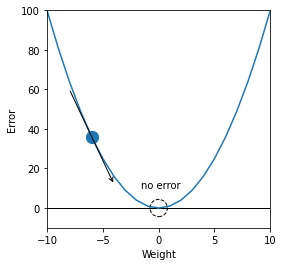

In [16]:
# pred = input * weight
# error = (pred - goal_pred) ** 2

# Error and weight have an exact relationship defined:
# error = ((input * weight) - goal_pred) ** 2

# The above equation forms a parabola. The lowest point on this parabola is the place where there is 0 error and the graph
# touches the x-axis, y is 0. 
# Any point on the parabola represents the current weight and the current error. Any point has a slope tangential to the graph 
# of the parabola. This slope always points towards the lowest point on the graph, meaning we can use the slope to find out the 
# direction and magnitude we should apply to weight to reach an error of 0.

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10, 11, 1)
y = x ** 2
plt.figure(figsize=(4, 4))
plt.xlabel("Weight")
plt.ylabel("Error")
plt.xlim(-10, 10)
plt.ylim(-10, 100)

x_error = np.array([0])
y_error = np.array([0])
x_error2 = np.array([-6])
y_error2 = np.array([36])
plt.scatter(x_error, y_error, s = 300, color = "black", facecolors = "none", linestyle = "dashed")
plt.scatter(x_error2, y_error2, s = 150)

plt.axhline(0, color = "black", linewidth = 1)
# equation for the slope at the point happens to be y = -12x - 36
plt.annotate("", xy = (-4, 12), xytext = (-8, 60), arrowprops = dict(arrowstyle = "->"))
plt.annotate("no error", xy = (0, 0), xytext = (-1.6, 10))
plt.plot(x, y)
plt.show()

# Machine learning research is about applying new things to the pred = input * weight equation to make better models. We cannot 
# change input because that's what we observed in the real world (so we would be interpreting results according to our whims)
# but we can change weight to change how we predict and reduce error.

# The graph represents what happens if you have a fixed input and goal_pred but plot every weight and each of their errors. 
# There will be a weight that gives a result with no error. This is the weight we want for this input.

In [18]:
# The derivative is just the relationship between two variables. So derivative of y = 2x is just 2, and this means if y is moved
# in a direction, x will move in the same direction twice as much. If the derivative is negative, then when you change one 
# variable, the other moves in the opposite direction. 

# The derivative is also the slope of a line at a point on a curve (see graph above). The derivative tells us how far we are
# from the weight value that will give us no error. It tells us the relationship between weight and error.

# The slope has an inverse relationship with the amount we should correct our weight. So a negative slope means we are too low
# and should aim higher, adding a positive value to our weight, as in the graph above.

# The derivative is just raw error * input. It is just direction_and_amount above. 
# delta = pred - goal_pred
# weight_delta = delta * input <- the derivative, the slope
# weight = weight - weight_delta <- minus because of the inverse relationship. Update the weight, learn.

# Divergence
# Now let's talk about alpha. If input is large, the update to the weight will be large. This causes problems when the error is
# small. It will make us overshoot the prediction. Since it was a large input, we overshot the prediction by a lot. Since we
# are so far off now, we have a very high error and this will cause us to overshoot again in the opposite direction. So we kind
# of dropped a ball into a bowl and it's just accelerating somehow over and over. That is divergence.

# weight = weight - (input * (pred - goal_pred))

# Basically, the derivative is really big. Small changes in weight mean big changes in error. We multiply the derivative by
# alpha to make it smaller and allow us more flexibility and improve our correction ability.

# If learning is too slow, increase alpha. If divergence is observed (increasing error), then you decrease alpha. Alpha is 
# determined with trial and error.

# weight = weight - (derivative * alpha)

In [26]:
# Try to code gradient descent neural network on your own.
alpha = 0.001
weight = 2
goal_pred = 0.8
input = 40

for iteration in range(20):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    derivative = (pred - goal_pred) * input
    
    # Update the weight each iteration = learning.
    weight = weight - (derivative * alpha)
    
    print("Error: ", error, " Weight: ", weight, " Pred: ", pred)

Error:  6272.64  Weight:  -1.1680000000000001  Pred:  80
Error:  2258.1504000000004  Weight:  0.7328000000000001  Pred:  -46.720000000000006
Error:  812.9341440000002  Weight:  -0.40768000000000004  Pred:  29.312000000000005
Error:  292.6562918400001  Weight:  0.2766080000000001  Pred:  -16.3072
Error:  105.35626506240003  Weight:  -0.13396479999999994  Pred:  11.064320000000002
Error:  37.92825542246398  Weight:  0.11237887999999999  Pred:  -5.358591999999998
Error:  13.654171952087035  Weight:  -0.03542732799999998  Pred:  4.495155199999999
Error:  4.915501902751332  Weight:  0.053256396799999994  Pred:  -1.4170931199999992
Error:  1.7695806849904796  Weight:  4.616192000000269e-05  Pred:  2.1302558719999998
Error:  0.6370490465965728  Weight:  0.031972302848  Pred:  0.0018464768000001075
Error:  0.22933765677476622  Weight:  0.0128166182912  Pred:  1.27889211392
Error:  0.0825615564389159  Weight:  0.024310029025280004  Pred:  0.512664731648
Error:  0.02972216031800977  Weight:  0.0